In [10]:
!pip install response

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 3.1 MB/s eta 0:00:0000:0100:01


In [65]:
import pandas as pd
import requests
import http.client
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Use double quotes to assign your API key to private_api_key variable as a string
private_api_key = "ddfde50cd1mshe28434f212e78bap142fa2jsn0423e3ebd2b4"

Each api call allows only to extract the date from one day from euro to multiple coins.
The following chunk of code will allow a for loop that takes each of the dates and saves the information on a data frame.

In [71]:
# Set the connection to the api
conn = http.client.HTTPSConnection("currency-conversion-and-exchange-rates.p.rapidapi.com")

# Set the header required for each API call
headers = {
    'x-rapidapi-key': "ddfde50cd1mshe28434f212e78bap142fa2jsn0423e3ebd2b4",
    'x-rapidapi-host': "currency-conversion-and-exchange-rates.p.rapidapi.com"
}

# Set a list of all of the dates that we want to check
l_dates = ["2024-07-24", "2024-07-25", "2024-07-26", "2024-07-27", "2024-07-28", "2024-07-29", 
           "2024-07-30", "2024-07-31", "2024-08-01", "2024-08-02", "2024-08-03", "2024-08-04", 
           "2024-08-05", "2024-08-06", "2024-08-07", "2024-08-08", "2024-08-09", "2024-08-10", 
           "2024-08-11", "2024-08-12", "2024-08-13", "2024-08-14", "2024-08-15", "2024-08-16", 
           "2024-08-17", "2024-08-18", "2024-08-19", "2024-08-20", "2024-08-21", "2024-08-22", 
           "2024-08-23", "2024-08-24", "2024-08-25", "2024-08-26", "2024-08-27", "2024-08-28", 
           "2024-08-29", "2024-08-30", "2024-08-31", "2024-09-01", "2024-09-02", "2024-09-03", 
           "2024-09-04", "2024-09-05", "2024-09-06"]
df_full = pd.DataFrame()
for date_to_get in l_dates:
    conn.request("GET", "/"+date_to_get+"?from=EUR&to=COP%2CBRL", headers=headers)

    res = conn.getresponse()
    data = res.read()

    print(data.decode("utf-8"))
    dict_resp = json.loads(data.decode("utf-8"))
    exchange_rates = pd.DataFrame.from_dict(dict_resp)
    exchange_rates.reset_index(inplace=True)

    df_full = pd.concat([exchange_rates, df_full])

{"timestamp":1721865599,"base":"EUR","success":true,"rates":{"ANG":1.953921,"SVC":9.486133,"CAD":1.496984,"XCD":2.929323,"MVR":16.637792,"HRK":7.487603,"AUD":1.648609,"MWK":1881.139462,"XAG":0.037509,"MAD":10.729097,"PHP":63.497131,"NAD":19.889689,"GNF":9335.183272,"KES":144.159902,"MZN":69.261901,"BTN":90.752408,"MGA":4918.24963,"AZN":1.846275,"XAU":0.000452,"RON":4.970163,"CHF":0.959321,"EGP":52.391487,"BSD":1.084201,"TWD":35.476189,"GGP":0.835219,"LVL":0.655647,"MMK":3520.500542,"WST":3.038862,"ILS":3.955966,"BHD":0.408523,"GBP":0.840281,"TZS":2926.559475,"SDG":635.17136,"LAK":24042.229294,"DJF":192.632573,"BYN":3.548076,"LBP":97118.423082,"RWF":1425.342922,"PEN":4.073012,"EUR":1,"ZMK":9756.496712,"RSD":117.064569,"INR":90.770227,"MUR":50.650878,"BWP":14.710656,"GEL":2.953702,"KMF":492.339483,"UZS":13651.858749,"RUB":93.477634,"CUC":1.083911,"BGN":1.955657,"JOD":0.768169,"NGN":1717.186388,"BDT":127.388361,"PKR":301.871331,"BRL":6.129628,"KZT":513.853051,"CVE":110.699227,"HNL":26.864

In [72]:
df_full

,index,timestamp,base,success,rates,date,historical
0,ANG,1725667199,EUR,True,1.999461,2024-09-06,True
1,SVC,1725667199,EUR,True,9.707643,2024-09-06,True
2,CAD,1725667199,EUR,True,1.506316,2024-09-06,True
3,XCD,1725667199,EUR,True,2.997824,2024-09-06,True
4,MVR,1725667199,EUR,True,17.027519,2024-09-06,True
...,...,...,...,...,...,...,...
166,CDF,1721865599,EUR,True,3105.404990,2024-07-24,True
167,VUV,1721865599,EUR,True,128.684119,2024-07-24,True
168,XAF,1721865599,EUR,True,655.897073,2024-07-24,True
169,KWD,1721865599,EUR,True,0.331352,2024-07-24,True


In [73]:
# Export to CSV to guarantee the acces to the information later on
df_full.to_csv("currency_exch_gen_dates.csv")

In order to not overcharge the free API usage we run two times the values. in diferent date lines and concatenate them.

In [89]:
# Read CSV
df_full = pd.read_csv("currency_exch_gen.csv")

In [90]:
# As we reset the indexes we require the name of the column to represent the "representative market rate"
df_full.rename(columns={"index":"currency_abreviation"}, inplace=True)

In [97]:
# Select the coin tag that corresponds to the country that we require
df_country = df_full[df_full["currency_abreviation"] == 'BRL']

In [98]:
# Reset the indexes and deleting the old index
df_country.reset_index(drop=True, inplace=True)

In [99]:
df_country.head()

,Unnamed: 0,currency_abreviation,timestamp,base,success,rates,date,historical
0,55,BRL,1729555199,EUR,True,6.154232,2024-10-21,True
1,55,BRL,1729468799,EUR,True,6.126415,2024-10-20,True
2,55,BRL,1729382399,EUR,True,6.191038,2024-10-19,True
3,55,BRL,1729295999,EUR,True,6.190495,2024-10-18,True
4,55,BRL,1729209599,EUR,True,6.121999,2024-10-17,True


In [100]:
# find the type of data on each column.
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            90 non-null     int64  
 1   currency_abreviation  90 non-null     object 
 2   timestamp             90 non-null     int64  
 3   base                  90 non-null     object 
 4   success               90 non-null     bool   
 5   rates                 90 non-null     float64
 6   date                  90 non-null     object 
 7   historical            90 non-null     bool   
dtypes: bool(2), float64(1), int64(2), object(3)
memory usage: 4.5+ KB


In [101]:
# Change date from object to date
df_country['date'] = pd.to_datetime(df_country['date'])

/var/folders/f_/hf8316d132j76nwh8g854fmm0000gn/T/ipykernel_12682/410872753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['date'] = pd.to_datetime(df_country['date'])


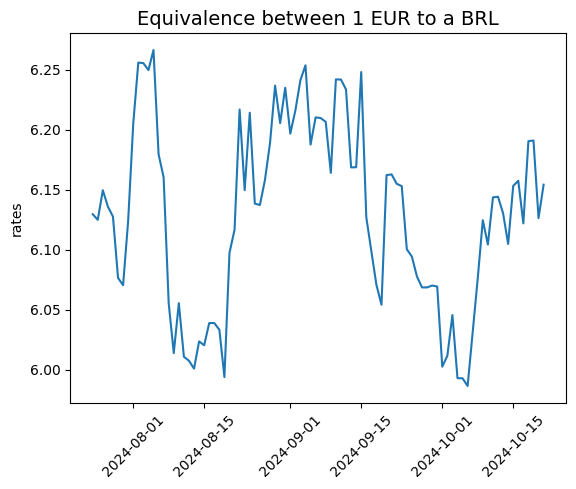

In [115]:
# Creating the line plot
sns.lineplot(x='date', y='rates', data=df_country)
plt.xlabel('')
plt.xticks(rotation=45)
plt.title("Equivalence between 1 EUR to a BRL", fontsize = 14)
plt.show()